# Introduction to Data Science 
# Activity for Lecture 9: Linear Regression 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Name: Jittrapol Sutejitsiri

Email: u1538222@umail.utah.edu

UID: u1538222


## Class exercise: analysis of the credit dataset 

Recall the 'Credit' dataset introduced in class and available [here](http://www-bcf.usc.edu/~gareth/ISL/data.html). 
This dataset consists of some credit card information for 400 people. 

First import the data and convert income to thousands.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


## Activity 1: A First Regression Model

**Exercise:** First regress Limit on Rating: 
$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}. 
$$
Since credit ratings are primarily used by banks to determine credit limits, we expect that Rating is very predictive for Limit, so this regression should be very good. 

Use the 'ols' function from the statsmodels python library. What is the $R^2$ value? What are $H_0$ and $H_A$ for the associated hypothesis test and what is the $p$-value? 


In [3]:
# your code goes here
credit_ols = sm.ols(formula="Limit ~ Rating", data=credit).fit()
credit_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Tue, 04 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:57:03   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Your answer goes here:**
- R-squared equal to 99.4%, meaning that 99.4% of the variability in the data is accounted for by the model. 
- H0 = Rating does not affect to credit limit.
- Ha = Rating have a significant affect to credit limit.

## Activity 2: Predicting Limit without Rating 

Since Rating and Limit are almost the same variable, next we'll forget about Rating and just try to predict Limit from the real-valued variables (non-categorical variables): Income, Cards, Age, Education, Balance. 

**Exercise:** Develop a multilinear regression model to predict Rating. Interpret the results. 

For now, just focus on the real-valued variables (Income, Cards, Age, Education, Balance)
and ignore the categorical variables (Gender, Student, Married, Ethnicity). 



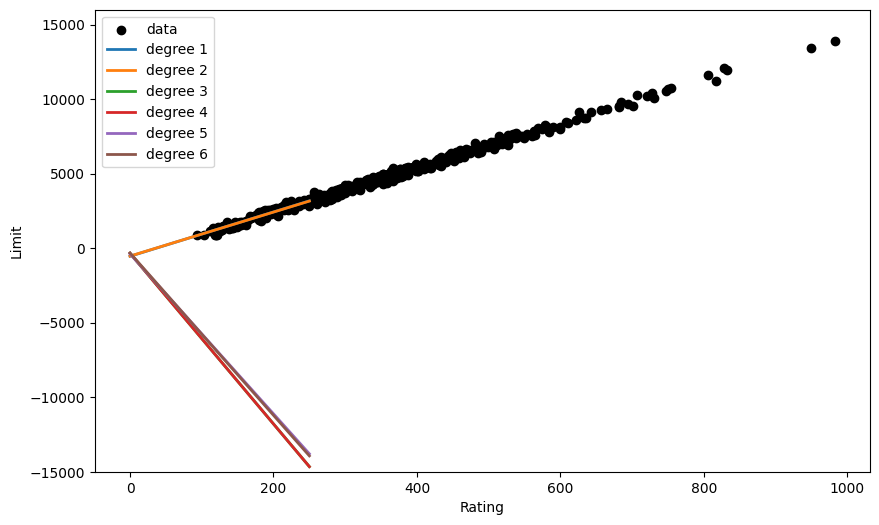

-542.9282299869014


In [19]:
# your code goes here 

# fit polynomial models
credit_ols1 = sm.ols(formula="Limit ~ Rating", data=credit).fit()
par1 = dict(credit_ols1.params)
credit_ols2 = sm.ols(formula="Limit ~ Rating + Income", data=credit).fit()
par2 = dict(credit_ols2.params)
credit_ols3 = sm.ols(formula="Limit ~ Rating + Income + Cards", data=credit).fit()
par3 = dict(credit_ols3.params)
credit_ols4 = sm.ols(formula="Limit ~ Rating + Income + Cards + Age", data=credit).fit()
par4 = dict(credit_ols4.params)
credit_ols5 = sm.ols(formula="Limit ~ Rating + Income + Cards + Age + Education", data=credit).fit()
par5 = dict(credit_ols5.params)
credit_ols6 = sm.ols(formula="Limit ~ Rating + Income + Cards + Age + Education + Balance", data=credit).fit()
par6 = dict(credit_ols6.params)

# make scatterplot of data
plt.scatter(credit['Rating'],credit['Limit'],color='black',label="data")

# evaluate polynomial models on a grid
x = np.linspace(0,250,1000)
y1 = par1["Intercept"] + par1['Rating']*x
y2 = par2["Intercept"] + par2['Rating']*x  + par2['Income']*x
y3 = par3["Intercept"] + par3['Rating']*x  + par3['Income']*x + par3['Cards']*x
y4 = par4["Intercept"] + par4['Rating']*x  + par4['Income']*x + par4['Cards']*x + par4['Age']*x 
y5 = par5["Intercept"] + par5['Rating']*x  + par5['Income']*x + par5['Cards']*x + par5['Age']*x + par5['Education']*x
y6 = par6["Intercept"] + par6['Rating']*x  + par6['Income']*x + par6['Cards']*x + par6['Age']*x + par6['Education']*x + par6['Balance']*x

# plot polynomial models
plt.plot(x,y1,label="degree 1",linewidth=2)
plt.plot(x,y2,label="degree 2",linewidth=2)
plt.plot(x,y3,label="degree 3",linewidth=2)
plt.plot(x,y4,label="degree 4",linewidth=2)
plt.plot(x,y5,label="degree 5",linewidth=2)
plt.plot(x,y6,label="degree 6",linewidth=2)
plt.legend()
plt.xlabel('Rating'); plt.ylabel('Limit')
plt.ylim((-15000,16000))
plt.show()
print(par1['Intercept'])

Which independent variables are good/bad predictors? What is the best overall model?

**Your observations:** Only rating have positive effects to credit limit while other variables have negative predictors to limit.


## Activity 3: Incorporating Categorical Variables Into Regression Models

Now consider the binary categorical variables which we mapped to integer 0, 1 values in class.

In [15]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

credit_model = sm.ols(formula="Income ~ Gender_num", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04589
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.830
Time:                        18:32:38   Log-Likelihood:                -4755.1
No. Observations:                 400   AIC:                             9514.
Df Residuals:                     398   BIC:                             9522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.561e+04   2539.977     17.957      0.000    4.06e+04    5.06e+04
Gender_num  -756.3885   3530.812     -0.214      0.830   -7697.761    6184.984
==============================================================================
Omnibus:                      137.942   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.093
Skew:                           1.735   Prob(JB):                     8.56e-75
Kurtosis:                       5.902   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Can you improve the model you developed in Activity 2 by incorporating one or more of these variables?


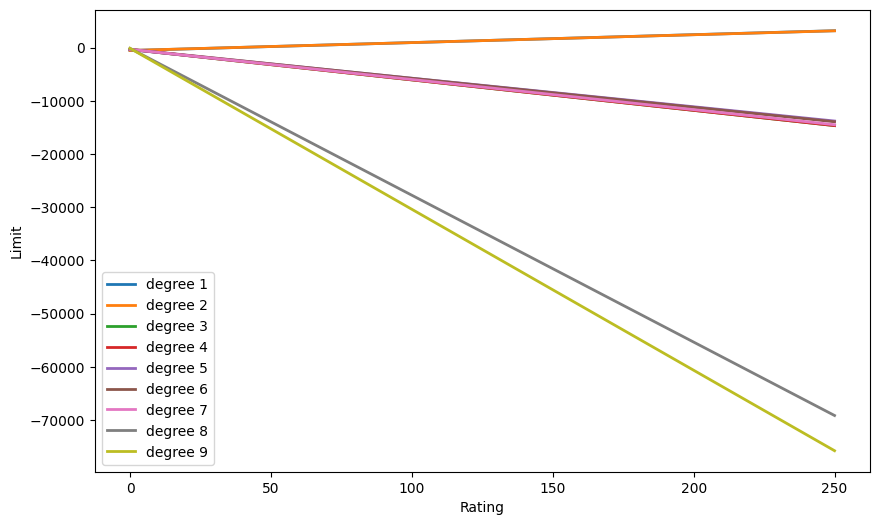

In [20]:
# your code here 
credit_ols7 = sm.ols(formula="Limit ~ Rating + Income + Cards + Age + Education + Balance + Gender_num", data=credit).fit()
par7 = dict(credit_ols7.params)
credit_ols8 = sm.ols(formula="Limit ~ Rating + Income + Cards + Age + Education + Balance + Gender_num + Student_num ", data=credit).fit()
par8 = dict(credit_ols8.params)
credit_ols9 = sm.ols(formula="Limit ~ Rating + Income + Cards + Age + Education + Balance + Gender_num + Student_num + Married_num", data=credit).fit()
par9 = dict(credit_ols9.params)

y7 = par7["Intercept"] + par7['Rating']*x  + par7['Income']*x + par7['Cards']*x + par7['Age']*x + par7['Education']*x + par7['Balance']*x + par7['Gender_num']*x
y8 = par8["Intercept"] + par8['Rating']*x  + par8['Income']*x + par8['Cards']*x + par8['Age']*x + par8['Education']*x + par8['Balance']*x + par8['Gender_num']*x + par8['Student_num']*x 
y9 = par9["Intercept"] + par9['Rating']*x  + par9['Income']*x + par9['Cards']*x + par9['Age']*x + par9['Education']*x + par9['Balance']*x + par9['Gender_num']*x + par9['Student_num']*x  + par9['Married_num']*x 
plt.plot(x,y1,label="degree 1",linewidth=2)
plt.plot(x,y2,label="degree 2",linewidth=2)
plt.plot(x,y3,label="degree 3",linewidth=2)
plt.plot(x,y4,label="degree 4",linewidth=2)
plt.plot(x,y5,label="degree 5",linewidth=2)
plt.plot(x,y6,label="degree 6",linewidth=2)
plt.plot(x,y7,label="degree 7",linewidth=2)
plt.plot(x,y8,label="degree 8",linewidth=2)
plt.plot(x,y9,label="degree 9",linewidth=2)
plt.legend()
plt.xlabel('Rating'); plt.ylabel('Limit')

plt.show()




**Your answer goes here:**
It seems like gender status does not affect the credit limit. Meanwhile student have a significant decrease to credit limit and married status cause a moderate negative effect to credit limit.